# Simulation options

In [1]:
L_arr = [8]
J_arr = [1.2]
h_arr = [1]
lamb_arr = [1]

x_basis = False

particle_pair_left_positions = [L//2 - 1 for L in L_arr]
particle_pair_length = 1

final_time = 10
steps = 250

error = 1e-2

In [2]:
from juliacall import Main as jl, convert as jlconvert
import juliacall

path_to_julia_tn = "../../z2chain/Z2HiggsChainDynamics.jl"
jl.seval(f"include(\"{path_to_julia_tn}\")")
jl.seval("using .Z2HiggsChainDynamics")

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Simulation 

In [ ]:
from utils.plotting import load_site_gauge_observable_matrix, save_site_gauge_observable_matrix
from itertools import product
import numpy as np
import os

overwrite = False

observable_matrices = [] # observable_matrices[L][opts][Jhλg][t]

for i, L in enumerate(L_arr):
    this_L_observable_matrices = []
    sites = jl.chain_sites(L)
    observables = jl.all_local_pauli_z(sites)
    for J, h, lamb in product(J_arr, h_arr, lamb_arr):
        filepath = f"Results/tnjulia_z2pairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J}_h_{h:.04f}_lamb_{lamb:.04f}_pl_{particle_pair_length}_xbasis_{x_basis}_error_{error}.txt"
        if os.path.exists(filepath) and not overwrite:
            this_observable_matrix = load_site_gauge_observable_matrix(filepath)
        else:
            this_observable_matrix = jl.particle_pair_quench_simulation(sites, observables, J, h, lamb, particle_pair_left_positions[i], particle_pair_length, final_time, steps, error)
            this_observable_matrix = np.array(this_observable_matrix)
            save_site_gauge_observable_matrix(this_observable_matrix, filepath)
        this_L_observable_matrices.append(this_observable_matrix)
    observable_matrices.append(this_L_observable_matrices)

# Plots

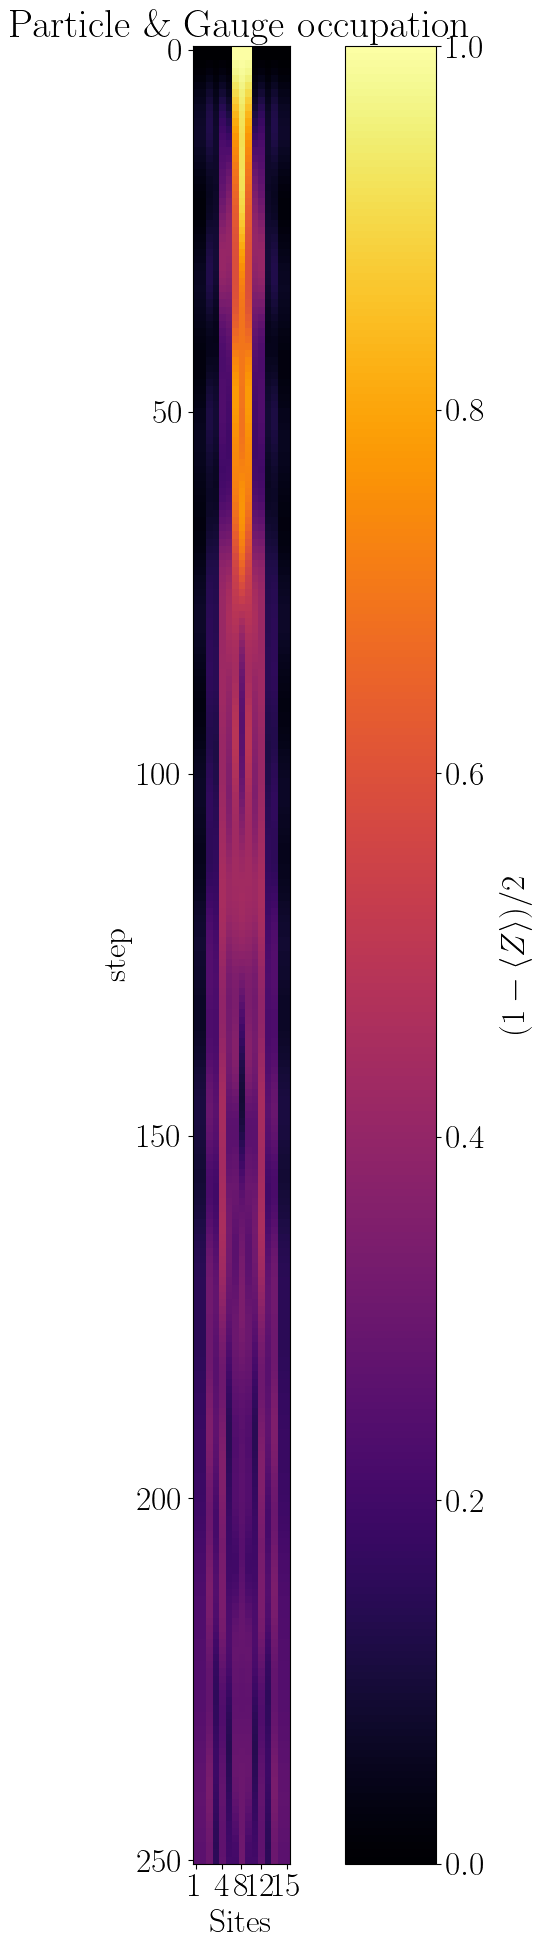

In [ ]:
from z2chain.plotting import x_t_plot

for i, L in enumerate(L_arr):
    for j, (J, h, lamb) in enumerate(product(J_arr, h_arr, lamb_arr)):
        x_t_plot((1-observable_matrices[i][j])/2, filepath=f"Plots/tnjulia_z2pairquench_maxt_{final_time}_steps_{steps}_L_{L}_J_{J}_h_{h:.04f}_lamb_{lamb:.04f}_pl_{particle_pair_length}_xbasis_{x_basis}_error_{error}.png")